In [1]:
#Import Library
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
df_raw = pd.read_csv('D:/Program Files/Python/Python310/Python Project/Dataset/loan_data_2007_2014.csv', index_col=0, low_memory=False)

## Exploratory Data Analysis (1) : Before Preprocessing untuk Menginspeksi Data (Mencari Gambaran Umum)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [4]:
df_raw.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
241124,35939184,38640769,5275,5275,5275.0,36 months,14.99,182.84,C,C5,Small Business Relationship Manager,2 years,OWN,62000.0,Source Verified,Nov-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,440xx,OH,10.61,0.0,Sep-90,0.0,NaN,76.0,5.0,3.0,2881,60.0,13.0,f,0.00,0.00,5717.140000,5717.14,5275.00,442.14,0.0,0.0,0.0,Oct-15,1147.43,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,20502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,NaN,NaN,NaN
214584,1319483,1564711,4000,4000,4000.0,36 months,15.81,140.26,C,C4,US Army,7 years,MORTGAGE,60000.0,Source Verified,Jun-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 06/02/12 > Have always wan...,major_purchase,Major purchase,314xx,GA,19.68,0.0,Jan-97,3.0,25.0,114.0,9.0,1.0,11455,67.8,42.0,f,0.00,0.00,5047.070804,5047.07,4000.00,1047.07,0.0,0.0,0.0,Jun-15,144.77,NaN,Jun-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298931,28783428,31306587,17000,17000,17000.0,60 months,9.17,354.30,B,B1,Building Engineer,10+ years,RENT,92000.0,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,941xx,CA,6.61,0.0,Feb-01,0.0,NaN,NaN,13.0,0.0,22753,43.8,20.0,w,12380.86,12380.86,6366.660000,6366.66,4619.14,1747.52,0.0,0.0,0.0,Jan-16,354.30,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,489528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51900.0,NaN,NaN,NaN
228297,1110152,1347234,16000,16000,15875.0,60 months,11.71,353.58,B,B3,Restaurant Management,10+ years,MORTGAGE,50000.0,Verified,Jan-12,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 01/16/12 > I will be using...,small_business,Home Investment,481xx,MI,27.86,0.0,Jul-97,0.0,NaN,NaN,12.0,0.0,4659,22.1,33.0,f,4301.45,4267.69,16610.580000,16481.05,11698.55,4912.03,0.0,0.0,0.0,Jan-16,353.58,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78229,7680881,9382314,25975,25975,25975.0,36 months,12.99,875.08,B,B4,Manager,2 years,MORTGAGE,58000.0,Verified,Nov-13,In Grace Period,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Control,770xx,TX,16.24,0.0,Feb-93,0.0,35.0,NaN,9.0,0.0,14541,73.4,24.0,w,9033.69,9033.69,21877.000000,21877.00,16941.31,4935.69,0.0,0.0,0.0,Jan-16,875.08,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,103996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19800.0,NaN,NaN,NaN


In [5]:
df_raw.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,

In [6]:
df_raw.nunique().sort_values(ascending=False)

id                             466285
member_id                      466285
url                            466285
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_int                  270249
tot_cur_bal                    220690
emp_title                      205475
last_pymnt_amnt                198194
total_rec_prncp                172713
out_prncp_inv                  141189
out_prncp                      135665
desc                           124436
title                           63099
revol_bal                       58142
installment                     55622
annual_inc                      31901
recoveries                      22773
collection_recovery_fee         20275
total_rev_hi_lim                14612
funded_amnt_inv                  9854
tot_coll_amt                     6321
total_rec_late_fee               5808
dti                              3997
funded_amnt                      1354
loan_amnt                        1352
revol_util  

In [7]:
#Check Duplicate
df_raw.duplicated(subset='id').values.any()

False

In [8]:
df_raw.duplicated(subset='member_id').values.any()

False

Informasi yang diperoleh :
- Dataset loan terdiri dari 466285 baris dan 74 kolom
- Dataset memiliki kolom numerikal sebanyak 52 (tipe data float64 sebanyak 46 dan int64 sebanyak 6) serta kolom numerikal sebanyak 22
- Dataset masih mengandung missing value (nilai not a number) sehingga perlu dihandle
- Dari descriptive statistive diperoleh informasi bahwa beberapa data dalam kolom ada yang memiliki outliers. Itu dilihat dari jauhnya rentang data dari quartile 3 (75%) dengan nilai maksimal, sehingga outliers ini nantinya perlu dihandle.
- Terdapat 17 kolom yang sama sekali tidak memiliki data (dilihat dari count = 0) sehingga bisa di drop karena tidak memberikan info apa-apa.
- Setelah dilakukan cek duplikat pada data primary key dan foreign key dari tabel yaitu id dan member_id, dapat disimpulkan bahwa tidak ada data yang terduplikasi. Artinya setiap baris mewakili satu individu unik.

## Data Prepocessing

### Menghapus kolom yang tidak berguna

Kolom yang dihapus adalah
- Kolom yang mengandung id unik (primary key dan foreign key) yaitu id dan member_id
- Kolom yang berupa teks bebas yang cenderung tidak berpola yaitu url dan desc
- Kolom yang sama sekali tidak memiliki data (all null) yaitu annual_inc_joint, dti_joint, verification_status_joint, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m
- Kolom yang berupa variabel kategorikal yang cenderung sangat unik yang tidak dibutuhkan yaitu zip_code
- Kolom yang berupa penjabaran dari kolom lainnya seperti sub_grade (terlalu spesifik) yang menjabarkan kolom grade. Untuk menyimpan satu saja kolom yang cenderung mewakili lebih banyak data.
- Kolom yang memiliki 1 value saja seperti application_type dan policy_code karena bisa dikatakan informasinya seragam/ sama

In [9]:
columns_to_drop = [
    'id','member_id',
    'url', 'desc',
    'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 
    'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 
    'total_cu_tl', 'inq_last_12m',
    'zip_code', 
    'sub_grade',
    'application_type','policy_code'
]

#Menyimpan data hasil penghapusan beberapa kolom dalam variabel df
df = df_raw.drop(columns_to_drop, axis=1)

#Menampilkan sample 5 data acak
df.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
253648,7000,7000,7000.0,36 months,12.39,233.81,C,Service Desk Analyst,2 years,MORTGAGE,41000.0,Verified,Nov-14,Current,n,credit_card,Credit card refinancing,MA,13.41,1.0,Oct-07,0.0,22.0,NaN,30.0,0.0,8293,23.7,33.0,f,4582.17,4582.17,3293.74,3293.74,2417.83,860.91,15.0,0.0,0.0,Jan-16,233.81,Feb-16,Jan-16,0.0,NaN,0.0,0.0,290646.0,25300.0
390724,8875,8875,8875.0,36 months,16.29,313.30,D,Inventory Control Coordinator,9 years,RENT,38000.0,Source Verified,May-14,Current,n,credit_card,Credit card refinancing,CA,31.46,0.0,Dec-03,2.0,NaN,48.0,11.0,1.0,3707,44.7,20.0,f,4478.28,4478.28,6266.00,6266.00,4396.72,1869.28,0.0,0.0,0.0,Jan-16,313.30,Feb-16,Jan-16,0.0,NaN,0.0,0.0,37070.0,8300.0
410378,19500,19500,19500.0,60 months,13.65,450.21,C,Owner,3 years,MORTGAGE,275000.0,Source Verified,Apr-14,Current,n,credit_card,Credit card refinancing,TX,9.28,1.0,Mar-02,1.0,9.0,NaN,12.0,0.0,11055,71.3,25.0,w,14116.67,14116.67,9454.41,9454.41,5383.33,4071.08,0.0,0.0,0.0,Jan-16,450.21,Feb-16,Jan-16,0.0,NaN,0.0,0.0,242166.0,15500.0
444020,15000,15000,15000.0,60 months,16.99,372.71,D,Lead Turnaround Planner,3 years,RENT,108000.0,Verified,Feb-14,Current,n,debt_consolidation,Debt consolidation,TX,11.11,1.0,Jan-03,5.0,10.0,NaN,9.0,0.0,12306,49.6,24.0,w,10676.79,10676.79,8572.33,8572.33,4323.21,4249.12,0.0,0.0,0.0,Jan-16,372.71,Feb-16,Jan-16,0.0,38.0,0.0,0.0,103806.0,24800.0
364717,30000,30000,30000.0,60 months,16.99,745.42,D,Vice President,10+ years,MORTGAGE,170000.0,Verified,Jul-14,Current,n,debt_consolidation,Debt consolidation,CT,20.62,0.0,Oct-89,1.0,NaN,NaN,14.0,0.0,40619,67.0,20.0,w,23477.94,23477.94,13417.56,13417.56,6522.06,6895.50,0.0,0.0,0.0,Jan-16,745.42,Feb-16,Jan-16,0.0,NaN,0.0,0.0,163952.0,60600.0


### Feature Engineering : Mencari kolom yang menjadi target variable dan menetapkan feature baru

Tujuan utama credit risk modelling : melakukan prediksi terhadap suatu individu akan kemampuan mereka untuk melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut.

Dalam dataset ini, variabel `loan_status` adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [10]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [11]:
df.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

`loan_status` memiliki nilai:
- Current : pembayaran lancar
- Fully Paid : pembayaran lunas
- Charged Off : pembayaran macet sehingga dihapusbukukan
- Late (31-120 days) : pembayaran telat dilakukan selama 31-120 hari
- Late (16-30 days) : pembayaran telat dilakukan selama 16-30 hari
- In Grace Period : dalam masa tenggang
- Does not meet the credit policy. Status:Fully Paid : tidak memenuhi kebijakan kredit dengan status pembayaran lunas
- Does not meet the credit policy. Status:Charged Off : tidak memenuhi kebijakan kredit dengan status pembayaran macet
- Default : pembayaran macet

Untuk mencari prediksi terhadap resiko kredit, definisi-definisi dari `loan_status` tersebut perlu dikelompokkan berdasarkan peminjam yang baik `good_load` dan peminjam yang buruk `bad_loan`. Pengelompokkan ini tergantung pada kebijakan perusahaan dan kebutuhan bisnis.

In [12]:
bad_loan = ['Charged Off','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off','Default']

#Feature Engineering membuat kolom baru sebagai pengidentifikasi bad_loan dan good_load
df['risk_flag'] = np.where(df['loan_status'].isin(bad_loan), 1, 0)
df['risk_flag'].value_counts()

0    415317
1     50968
Name: risk_flag, dtype: int64

In [13]:
df['risk_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: risk_flag, dtype: float64

Dari feature engineering di atas dibuatlah feature baru bernama risk_flag yang menjadi kolom target untuk menentukan credit risk. `bad_load` diwakili oleh nilai 1, sementara `good_load` diwakili oleh nilai 0. Dari situ, dapat dilihat bahwa jumlah `bad_loan` lebih sedikit daripada jumlah `good_loan` (tidak memiliki proporsi yang seimbang) sehingga diperoleh kesimpulan bahwa dataset yang digunakan imbalance.

In [14]:
#Membuang kolom loan_status karena sudah tidak digunakan lagi
df.drop('loan_status', axis=1, inplace=True)

### Data Cleaning to Handle Inconsistencies

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_title                    438697 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

In [16]:
#Mengecek jumlah unik dari kolom kategorikal
categorical_columns = [
    'term','grade','emp_title','emp_length','home_ownership','verification_status','issue_d','pymnt_plan','purpose','title',
    'addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d'
]
df[categorical_columns].nunique()

term                        2
grade                       7
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
dtype: int64

Dari pengecekan jumlah nilai unik, beberapa kolom kategorikal memiliki nilai unik yang sangat banyak sehingga tidak ikut dibersihkan. Yang dibersihkan adalah kolom kategorikal dengan nilai unik < 1000

In [17]:
##Mengecek nilai unik dari kolom kategorikal tertentu
specific_col = ['term','grade','emp_length','home_ownership','verification_status','issue_d','pymnt_plan','purpose','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d']

for column in specific_col:
    print('\nNilai unik dari kolom', column)
    print(df[column].unique())


Nilai unik dari kolom term
[' 36 months' ' 60 months']

Nilai unik dari kolom grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

Nilai unik dari kolom emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

Nilai unik dari kolom home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Nilai unik dari kolom verification_status
['Verified' 'Source Verified' 'Not Verified']

Nilai unik dari kolom issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07' 'Dec-13'
 'Nov-13' 'Oct-1

Dari pengecekan nilai unik diperoleh informasi:
- Kolom grade, home_ownership, verification_status, pyment_plan, purpose, addr_state, dan initial_list_status memiliki nilai yang konsisten (berupa teks semua dan tidak menunjukkan maksud implisit dari angka/ tanggal) sehingga tidak perlu dibersihkan
- Kolom term memiliki nilai yang menunjukkan bulan dalam tipe object, ini akan dibersihkan dengan menghilangkan kata 'months' dan mengganti tipe data dari object menjadi float
- Kolom emp_length memiliki nilai yang menunjukkan tahun dalam tipe object, ini akan dibersihkan dengan menghilangkan kata 'years' dan karakter lain (seperti operator + dan <) dan mengganti tipe data dari object menjadi float
- Kolom issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, dan last_credit_pull_d memiliki nilai yang menunjukkan bulan dan tahun dalam tipe object, ini akan dibersihkan dengan mengubahnya menjadi format datetime, kemudian akan diubah lagi menjadi tipe numerik untuk mencari tahu berapa lama loan dibuat, dibayarkan, dll.

In [18]:
#term
#membuat kolom baru berisi perubahan (hasil pembersihan) dari kolom term
df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].astype(float)

#menghapus kolom term sebelumnya yang tidak digunakan lagi
df.drop('term', axis=1, inplace=True)

In [19]:
#emp_length
#membuat kolom baru berisi perubahan (hasil pembersihan) dari kolom emp_length
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')
df['emp_length_int'] = df['emp_length_int'].astype(float)

#menghapus kolom emp_length sebelumnya yang tidak digunakan lagi
df.drop('emp_length', axis=1, inplace=True)

C:\Users\ENVY\AppData\Local\Temp\ipykernel_12328\195263980.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')


Perhitungan berapa lama waktu berlalu sejak loan dibuat pada umumnya dihitung dari tanggal date now - tanggal awal loan dibuat. Namun, karena dataset loan ini berisi data tahun 2007-2014, maka perhitungan waktu ditetapkan pada tahun 2017. Contoh yang digunakan adalah tanggal 2017-01-01.

In [20]:
#earliest_cr_line
df['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [21]:
#earliest_cr_line
#membuat kolom baru berisi perubahan (hasil pembersihan) dari kolom earliest_cr_line
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [22]:
#membuat kolom baru berisi perhitungan berapa lama waktu berlalu sejak loan dibuat, dibayarkan, dll
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-01-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head(3)

0    384.0
1    213.0
2    182.0
Name: mths_since_earliest_cr_line, dtype: float64

In [23]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        228.482430
std          93.974829
min        -623.000000
25%         172.000000
50%         214.000000
75%         274.000000
max         576.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terlihat nilai yang aneh yaitu negatif

In [24]:
df[df['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-548.0
1770,Sep-68,2068-09-01,-620.0
2799,Sep-64,2064-09-01,-572.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962. Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena di sini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [25]:
#Mengganti keanehan tadi dengan nilai max
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [26]:
#issue_d
#membuat kolom baru berisi perubahan (hasil pembersihan) dari kolom issue_d
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
#membuat kolom baru berisi perhitungan berapa lama waktu berlalu sejak loan dibuat, dibayarkan, dll
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-01-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))
df['mths_since_issue_d'].describe()

count    466285.000000
mean         40.255187
std          14.340154
min          25.000000
25%          30.000000
50%          36.000000
75%          46.000000
max         115.000000
Name: mths_since_issue_d, dtype: float64

In [27]:
#last_pymnt_d
#membuat kolom baru berisi perubahan (hasil pembersihan) dari kolom issue_d
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
#membuat kolom baru berisi perhitungan berapa lama waktu berlalu sejak loan dibuat, dibayarkan, dll
df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-01-01') - df['last_pymnt_d_date']) / np.timedelta64(1, 'M')))
df['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         20.294369
std          12.809898
min          12.000000
25%          12.000000
50%          13.000000
75%          24.000000
max         109.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [28]:
#next_pymnt_d
#membuat kolom baru berisi perubahan (hasil pembersihan) dari kolom issue_d
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
#membuat kolom baru berisi perhitungan berapa lama waktu berlalu sejak loan dibuat, dibayarkan, dll
df['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-01-01') - df['next_pymnt_d_date']) / np.timedelta64(1, 'M')))
df['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         11.738136
std           6.082298
min          10.000000
25%          11.000000
50%          11.000000
75%          11.000000
max         109.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [29]:
#last_credit_pull_d
#membuat kolom baru berisi perubahan (hasil pembersihan) dari kolom issue_d
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
#membuat kolom baru berisi perhitungan berapa lama waktu berlalu sejak loan dibuat, dibayarkan, dll
df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-01-01') - df['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))
df['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         16.045588
std           9.636423
min          12.000000
25%          12.000000
50%          12.000000
75%          14.000000
max         116.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [30]:
#menghapus kolom yang tidak digunakan lagi
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)
df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)
df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)
df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)
df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

### Mencari korelasi features

C:\Users\ENVY\AppData\Local\Temp\ipykernel_12328\194829208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


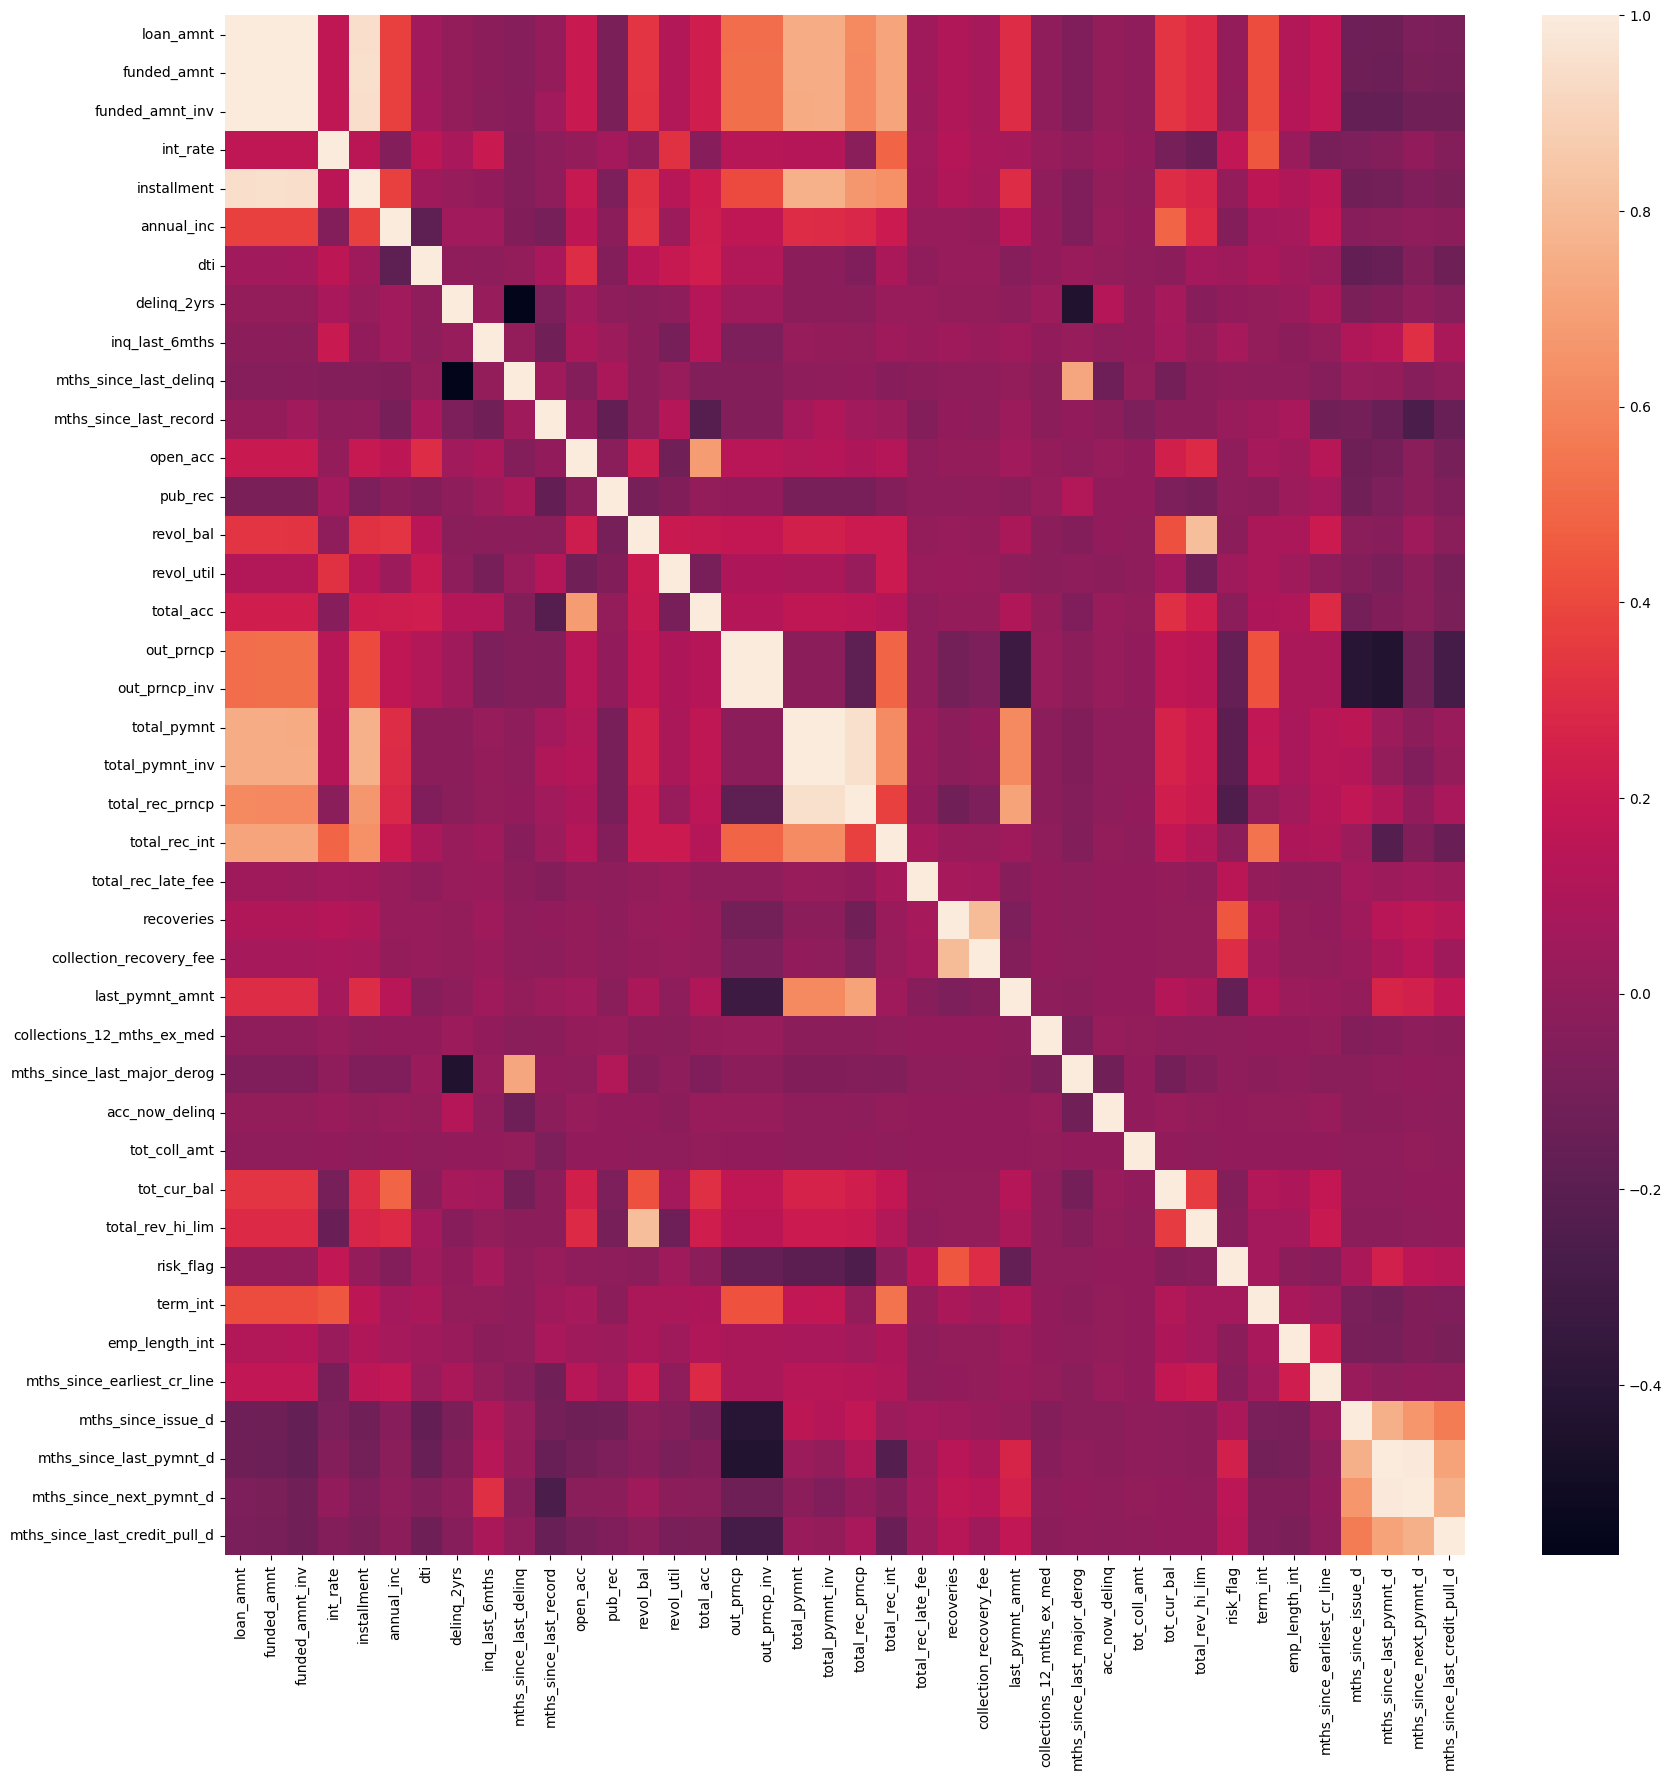

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())
plt.show()

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [32]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr

C:\Users\ENVY\AppData\Local\Temp\ipykernel_12328\2387715113.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
C:\Users\ENVY\AppData\Local\Temp\ipykernel_12328\2387715113.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [33]:
#Membuang kolom yang memiliki korelasi tinggi dengan kolom lainnya (buang yang lain, pertahankan 1)
df.drop(to_drop_hicorr, axis=1, inplace=True)

In [34]:
#Mencari nilai unik dari kolom kategorikal
df.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
dtype: int64

In [35]:
#Pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality)
df.drop(['emp_title', 'title'], axis=1, inplace=True)

In [36]:
for col in df.select_dtypes(include='object').columns.tolist():
    print('\nValue count kolom', col)
    print(df[col].value_counts(normalize=True)*100)


Value count kolom grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64

Value count kolom home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64

Value count kolom verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64

Value count kolom pymnt_plan
n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64

Value count kolom purpose
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
h

In [37]:
#Membuang fitur yang sangat didominasi oleh salah satu nilai saja
df.drop('pymnt_plan', axis=1, inplace=True)

In [38]:
#Mencari nilai unik dari kolom numerical
df.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
risk_flag                           2
term_int                            2
emp_length_int                     11
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

Tidak ada kolom dari numerikal yang dibuang

### Handle missing value 

In [39]:
#Check Missing Value
df.isnull().sum().sort_values(ascending=False)

mths_since_last_record         403647
mths_since_last_delinq         250351
tot_cur_bal                     70276
tot_coll_amt                    70276
emp_length_int                  21008
revol_util                        340
collections_12_mths_ex_med        145
inq_last_6mths                     29
acc_now_delinq                     29
mths_since_earliest_cr_line        29
total_acc                          29
delinq_2yrs                        29
open_acc                           29
pub_rec                            29
annual_inc                          4
loan_amnt                           0
total_rec_late_fee                  0
risk_flag                           0
term_int                            0
recoveries                          0
revol_bal                           0
out_prncp                           0
initial_list_status                 0
int_rate                            0
dti                                 0
addr_state                          0
purpose     

In [40]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

In [41]:
#Membuang kolom-kolom dengan missing values di atas 75%
df.drop('mths_since_last_record', axis=1, inplace=True)

In [42]:
#Imputation : mengisi missing value
df['mths_since_last_delinq'].fillna(-1, inplace=True)
df['tot_coll_amt'].fillna(0, inplace=True)
df['tot_cur_bal'].fillna(0, inplace=True)
df['emp_length_int'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

### Cek Distribusi dan Normalisasi Data

## Feature Scaling

### One Hot Encoding

In [43]:
#Mengubah semua kolom kategorikal menjadi numerikal dengan One Hot Encoding
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardization

In [44]:
#Melakukan proses standarisasi semua kolom numerikal (kecuali kolom target) dengan StandardScaler
numerical_cols = [col for col in df.columns.tolist() if col not in categorical_cols + ['risk_flag']]
std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_cols]), columns=numerical_cols)
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.616225,1.138605,1.764971,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,1.622784,-1.523744,-0.212438,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.616225,1.138605,-0.570916,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.616225,1.138605,0.226986,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.622784,-1.257509,0.238550,1.446626


### Data Transformation

In [45]:
#Menggabungkan kembali kolom-kolom hasil transformasi
data_model = pd.concat([onehot, std, df[['risk_flag']]], axis=1)

## Modelling

### Train-Test Split

In [46]:
X = data_model.drop('risk_flag', axis=1)
y = data_model['risk_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Jumlah (baris, kolom) Data Train =', X_train.shape)
print('Jumlah (baris, kolom) Data Test =', X_test.shape)

Jumlah (baris, kolom) Data Train = (373028, 99)
Jumlah (baris, kolom) Data Test = (93257, 99)


## Random Forest Classifier 

In [47]:
rfc = RandomForestClassifier(max_depth=4).fit(X_train, y_train)

In [48]:
#Feature Importances
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
90,recoveries,5.450334e-01
88,out_prncp,1.509141e-01
89,total_rec_late_fee,9.281176e-02
77,int_rate,7.330626e-02
98,mths_since_issue_d,2.573509e-02
3,grade_E,1.581634e-02
4,grade_F,1.422033e-02
95,term_int,1.059300e-02
0,grade_B,9.613848e-03
2,grade_D,8.755809e-03


In [49]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
# Print classification report 
print('Classification Report Train Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))
print('\nAccuracy Score Training (Random Forest Classifier): %.3f%%' % (accuracy_score(y_train, y_train_pred)*100.0))
print('\n')
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))
print('\nAccuracy Score Testing (Random Forest Classifier): %.3f%%' % (accuracy_score(y_test, y_test_pred)*100.0))

Classification Report Train Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    332250
           1       1.00      0.08      0.15     40778

    accuracy                           0.90    373028
   macro avg       0.95      0.54      0.55    373028
weighted avg       0.91      0.90      0.86    373028


Accuracy Score Training (Random Forest Classifier): 89.947%


Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     83067
           1       1.00      0.08      0.15     10190

    accuracy                           0.90     93257
   macro avg       0.95      0.54      0.55     93257
weighted avg       0.91      0.90      0.86     93257


Accuracy Score Testing (Random Forest Classifier): 89.930%


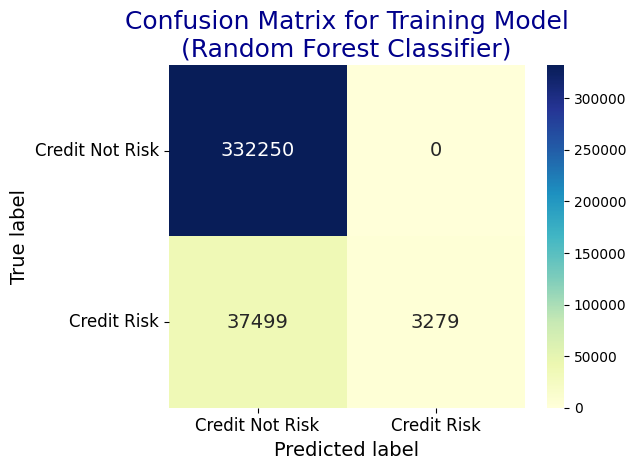

In [50]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Credit Not Risk', 'Credit Risk'), ('Credit Not Risk', 'Credit Risk'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

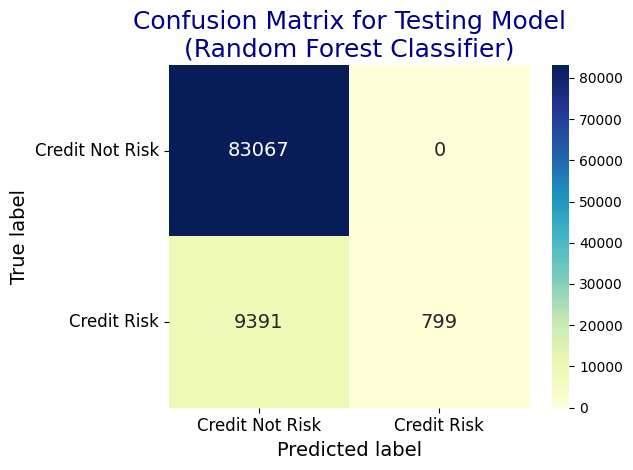

In [51]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Credit Not Risk', 'Credit Risk'), ('Credit Not Risk', 'Credit Risk'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Algoritma Random Forest Classifier performanya mengalami Appropriate-Fitting karena mampu memprediksi sama baiknya di fase training maupun testing (akurasi training kurang lebih 89% dan akurasi testing kurang lebih 89%)

### Validation Random Forest Classifier : AUC dan KS

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [52]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

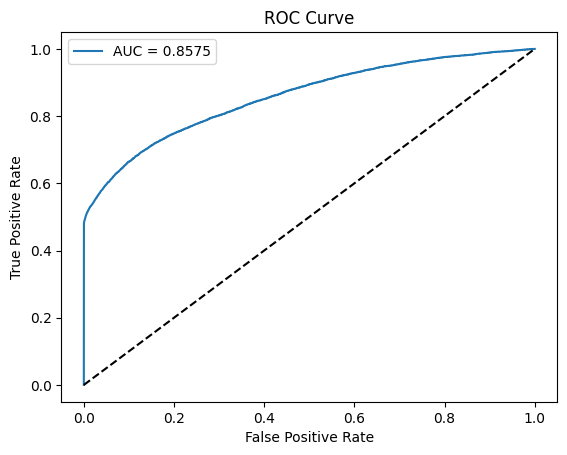

In [53]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [54]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [55]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,372253,0,0.046628,1,0,1,0.000011,0.0,0.000012
1,312703,0,0.047004,2,0,2,0.000021,0.0,0.000024
2,346851,0,0.047140,3,0,3,0.000032,0.0,0.000036
3,294816,0,0.047146,4,0,4,0.000043,0.0,0.000048
4,386467,0,0.047206,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5658')

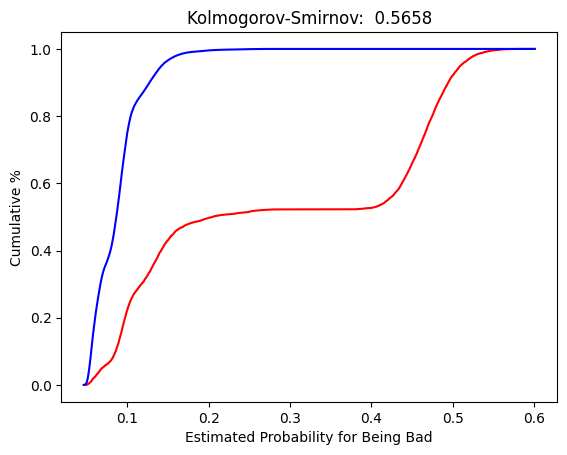

In [56]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.8583`dan `KS = 0.5643`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

## Logistic Regression 

In [57]:
loreg = LogisticRegression(solver='liblinear', max_iter=100).fit(X_train, y_train)

In [58]:
#Feature Importances

In [59]:
y_train_pred = loreg.predict(X_train)
y_test_pred = loreg.predict(X_test)
# Print classification report 
print('Classification Report Train Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred))
print('\nAccuracy Score Training (Logistic Regression): %.3f%%' % (accuracy_score(y_train, y_train_pred)*100.0))
print('\n')
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))
print('\nAccuracy Score Testing (Logistic Regression): %.3f%%' % (accuracy_score(y_test, y_test_pred)*100.0))

Classification Report Train Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    332250
           1       0.98      0.46      0.62     40778

    accuracy                           0.94    373028
   macro avg       0.96      0.73      0.79    373028
weighted avg       0.94      0.94      0.93    373028


Accuracy Score Training (Logistic Regression): 93.940%


Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83067
           1       0.98      0.46      0.62     10190

    accuracy                           0.94     93257
   macro avg       0.96      0.73      0.80     93257
weighted avg       0.94      0.94      0.93     93257


Accuracy Score Testing (Logistic Regression): 93.964%


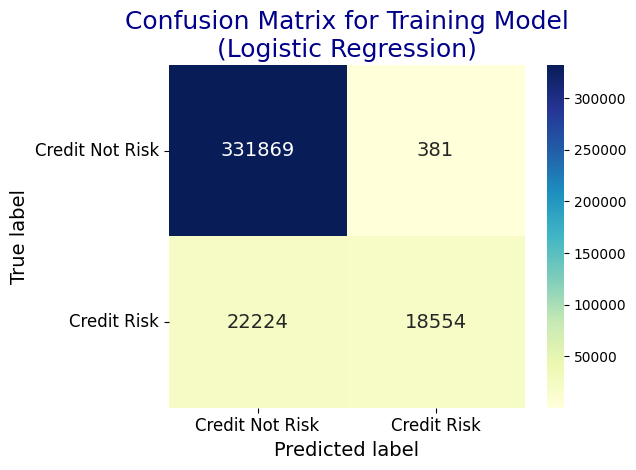

In [60]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Credit Not Risk', 'Credit Risk'), ('Credit Not Risk', 'Credit Risk'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

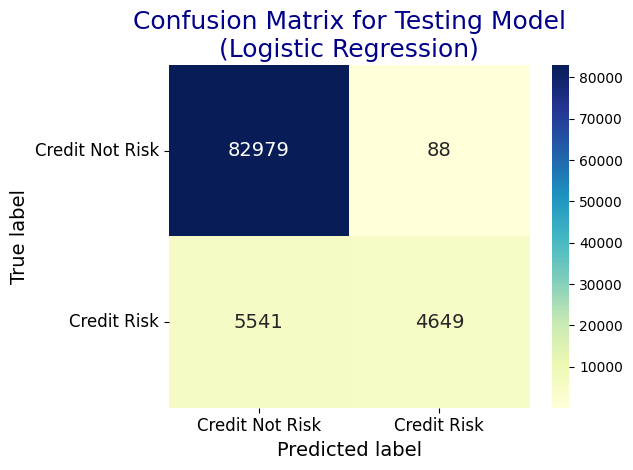

In [61]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Credit Not Risk', 'Credit Risk'), ('Credit Not Risk', 'Credit Risk'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Algoritma Logistic Regression performanya mengalami Appropriate-Fitting karena mampu memprediksi sama baiknya di fase training maupun testing (akurasi training kurang lebih 93% dan akurasi testing kurang lebih 93%)

### Validation Logistic Regression : AUC dan KS

In [62]:
y_pred_proba = loreg.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

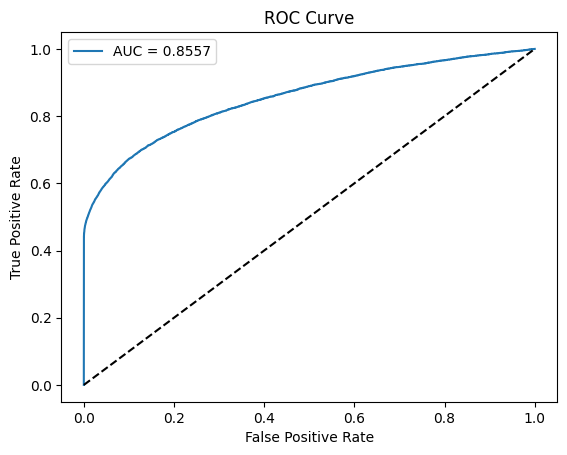

In [63]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [64]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [65]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,451987,0,1.379039e-21,1,0,1,0.000011,0.0,0.000012
1,325185,0,2.530127e-21,2,0,2,0.000021,0.0,0.000024
2,257464,0,1.144405e-06,3,0,3,0.000032,0.0,0.000036
3,304690,0,3.952982e-06,4,0,4,0.000043,0.0,0.000048
4,184924,0,7.894406e-06,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5727')

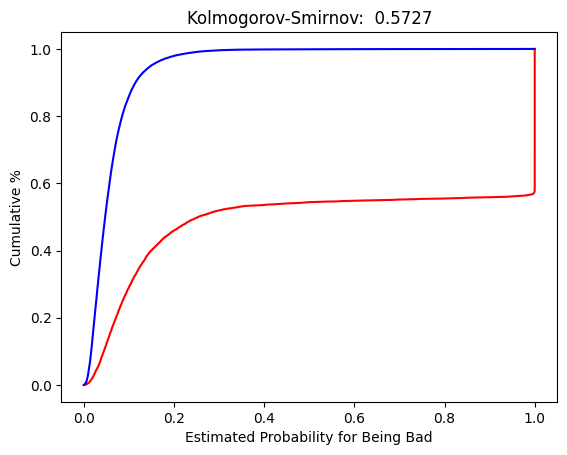

In [66]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.8557` dan `KS = 0.5727`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

## Gradient Boosting Classifier

In [67]:
gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, y_train)

y_train_pred = gbc.predict(X_train)

y_test_pred = gbc.predict(X_test)

# Print classification report 
print('Classification Report Train Model (Gradient Boosting Classifier):')
print(classification_report(y_train, y_train_pred))
print('\nAccuracy Score Training (Gradient Boosting Classifier): %.3f%%' % (accuracy_score(y_train, y_train_pred)*100.0))
print('\n')
print('Classification Report Testing Model (Gradient Boosting Classifier):')
print(classification_report(y_test, y_test_pred))
print('\nAccuracy Score Testing (Gradient Boosting Classifier): %.3f%%' % (accuracy_score(y_test, y_test_pred)*100.0))

Classification Report Train Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    332250
           1       0.99      0.50      0.66     40778

    accuracy                           0.94    373028
   macro avg       0.96      0.75      0.81    373028
weighted avg       0.95      0.94      0.94    373028


Accuracy Score Training (Gradient Boosting Classifier): 94.399%


Classification Report Testing Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83067
           1       0.99      0.50      0.66     10190

    accuracy                           0.94     93257
   macro avg       0.96      0.75      0.82     93257
weighted avg       0.95      0.94      0.94     93257


Accuracy Score Testing (Gradient Boosting Classifier): 94.437%


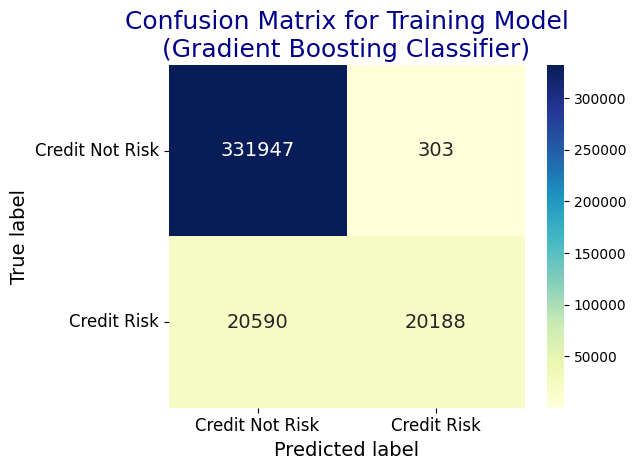

In [68]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Credit Not Risk', 'Credit Risk'), ('Credit Not Risk', 'Credit Risk'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

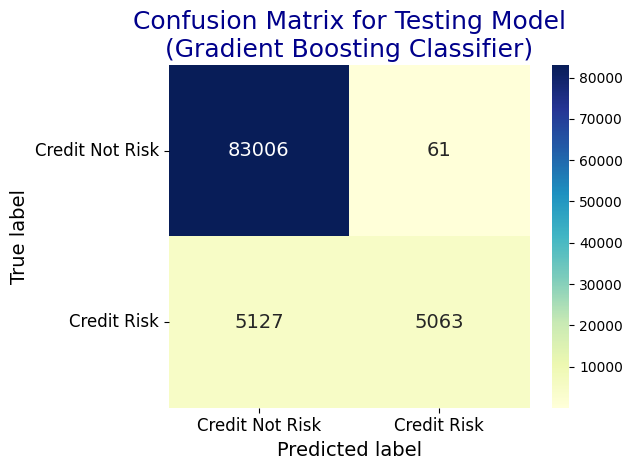

In [69]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Credit Not Risk', 'Credit Risk'), ('Credit Not Risk', 'Credit Risk'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Algoritma Gradient Boosting Classifier performanya mengalami Appropriate-Fitting karena mampu memprediksi sama baiknya di fase training maupun testing (akurasi training kurang lebih 94% dan akurasi testing kurang lebih 94%)

### Validation Gradient Boosting Classifier : AUC dan KS

In [70]:
y_pred_proba = gbc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

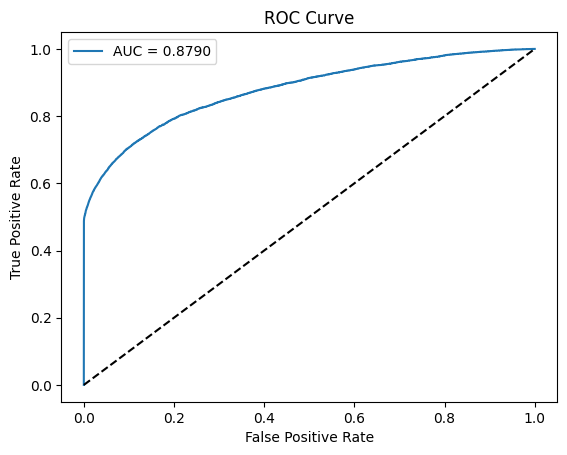

In [71]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [72]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [73]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,167592,0,0.007035,1,0,1,0.000011,0.0,0.000012
1,159393,0,0.007910,2,0,2,0.000021,0.0,0.000024
2,165160,0,0.008033,3,0,3,0.000032,0.0,0.000036
3,139693,0,0.008059,4,0,4,0.000043,0.0,0.000048
4,105278,0,0.008087,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.6077')

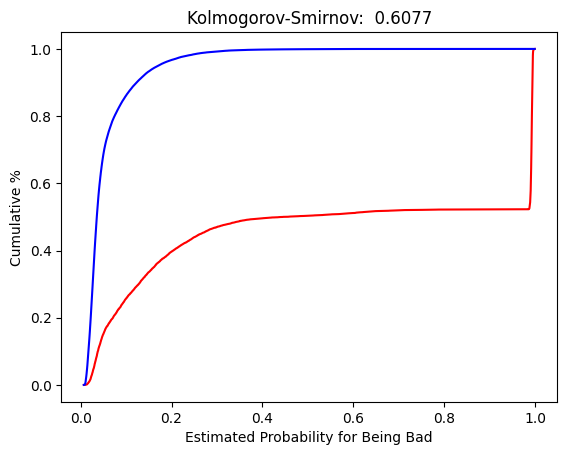

In [74]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.8790` dan `KS = 0.6077`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.